<a href="https://colab.research.google.com/github/ummulqura/Pengantar-Data-Science/blob/main/Data_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##   **Nama : Ummul Qura** 
##   **NIM : H071201017**
##   **Kelas : Pengantar Data Science** 
---




# **DATA CLASIFICATION**

## **Deskripsi Data**

Dataset ini merupakan dataset terkait dengan varian anggur merah (red wine)
Portugis "Vinho Verde" yang terdiri dari 1599 observasi hasil uji psikokimia. Data ini terdiri dari 11 variabel independen (x) yang berupa kandungan zat yang mempengaruhi kualitas red wine dan 1 variabel dependen (y = quality). Dimana kualitas red wine di bagi menjadi 2 kategorik, yaitu **Good** **dengan nilai quality >= 6.5 dan Bad < 6.5**. Adapun Atribut dalam dataset ini sebagai berikut:
1. fixed acidity (keasaman tetap) : yaitu sebagian besar asam yang terdapat dalam wine bersifat tetap atau tidak mudah menguap.
2. volatile acidity (keasaman yang mudah menguap) : jumlah asam asetat dalam wine, yang pada kadar terlalu tinggi dapat menghasilkan rasa cuka yang tidak mengenakkan.
3. citric acid (asam sitrat) : terdapat dalam jumlah kecil, asam sitrat dapat memberikan aroma dan rasa pada wine.
4. residual sugar (sisa gula) :jumlah gula yang tersisa setelah fermentasi selesai, sangat jarang ditemukan wine dengan kadar kurang dari 1 gram/liter dan wine dengan kadar lebih dari 45 gram/liter dianggap sebagai wine manis.
5. chlorides (klorida) : jumlah garam dalam wine
6. free sulfur dioxide (SO2 bebas): bentuk bebas dari SO2 berada dalam kesetimbangan antara molekul SO2 (sebagai gas terlarut) dan ion bisulfit; hal ini mencegah pertumbuhan mikroba dan oksidasi wine
7. total sulfur dioxide : jumlah bentuk SO2 bebas dan terikat; pada konsentrasi rendah, SO2 sebagian besar tidak terdeteksi dalam wine, tetapi pada konsentrasi SO2 bebas di atas 50 ppm, SO2 menjadi jelas tercium di hidung dan rasa dari wine
8. density (kepadatan) : kepadatannya mendekati kepadatan air, tergantung pada persen alkohol dan kadar gula
9. pH : menggambarkan seberapa asam atau basa wine dalam skala dari 0 (sangat asam) hingga 14 (sangat basa), sebagian besar wine berada di antara 3-4 pada skala pH.
10. sulphates (sulfat) : bahan aditif wine yang dapat berkontribusi pada kadar gas sulfur dioksida (SO2), yang berfungsi sebagai antimikroba dan antioksidan
11. alcohol : persen kandungan alkohol
12. quality : variabel output (berdasarkan data sensorik, skor antara 0 dan 10)

> **Source Dataset :** https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv





## **1. Read Data**

### **1.1 Import Library**

In [1]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import naive_bayes

### **1.2 Menampilkan Data Set**

In [2]:
# Read dan tampilkan data
df = pd.read_csv('/content/drive/MyDrive/ML/Dataset/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


dapat dilihat jika tidak terdapat data dengan nilai null

## **2. Split Data**

In [4]:
# Menampilkan banyaknya setiap kelompok data di variabel quality
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
# Membuat kelompok good dan bad quality wine
bins = (2, 6.5, 8)
labels = [0, 1]
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

kita mengelompokkan "quality" menjadi 2 kelompok yaitu "0" yang berarti bad quality dan "1" yang berarti good quality. kriteria dari good quality yaitu jika "quality" >= 6.5.


In [6]:
# Menampilkan Bad dan Good quality wine
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

dapat diketahui bahwa data ini tidak seimbang karena banyak data dengan good quality lebih sedikit dibandingkan banyak data bad quality

In [7]:
# Pembuatan variabel x dan y
y = df.quality
X = df.drop(['quality'], axis = 1)

In [8]:
# Split Data ke data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Oversampling dengan menggunakan SMOTE
sm = SMOTE(random_state=14)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [10]:
# perbandingan setelah SMOTE
print("Sebelum SMOTE --> ", collections.Counter(y_train))
print("Setelah SMOTE --> ", collections.Counter(y_train_sm))

Sebelum SMOTE -->  Counter({0: 1109, 1: 170})
Setelah SMOTE -->  Counter({0: 1109, 1: 1109})


karena sebelumnya data yang kita punya tidak seimbang, maka kita menggunakan metode oversampling SMOTE sehingga banyaknya data good quality = banyak data bad quality

In [11]:
# Scaling Data
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm) 
X_test = scaler.transform(X_test) 


## **3. Visualisasi Data**

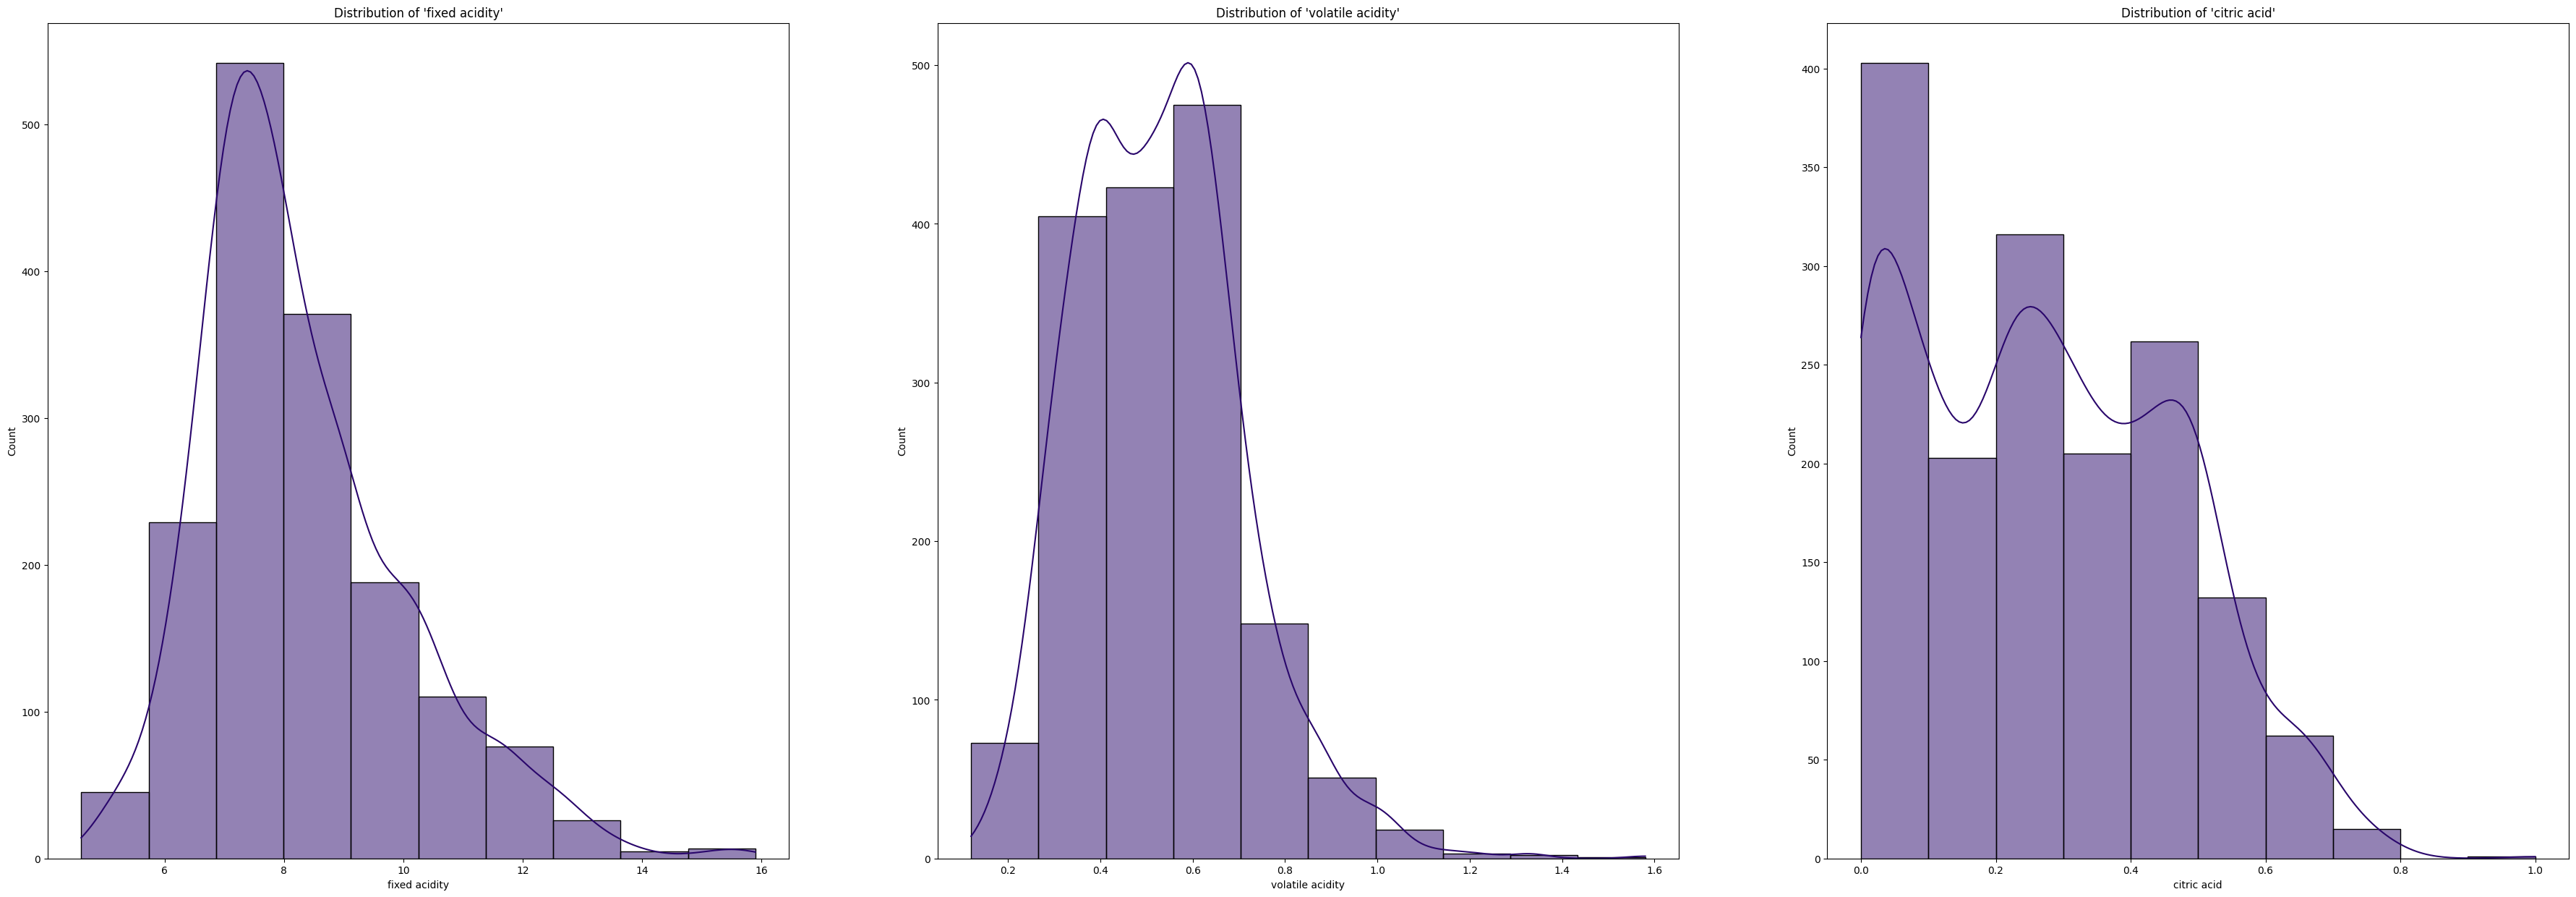

In [12]:
# Histogram
fig, axes = plt.subplots(1, 3, figsize = (45, 15))

sns.histplot(ax = axes[0], x = df["fixed acidity"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'fixed acidity'");

sns.histplot(ax = axes[1], x = df["volatile acidity"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#29066B").set(title = "Distribution of 'volatile acidity'");

sns.histplot(ax = axes[2], x = df["citric acid"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'citric acid'");

Dari gambar histogram diatas dapat dianalisis bahwa nilai "fixed acidity" relatif terdistribusi secara normal, namun sedikit miring ke kiri. terdapat dua titik puncak dalam distribusi variabel 'volatile acidity' dan tiga titik puncak dalam distribusi variabel 'citric acidity'.

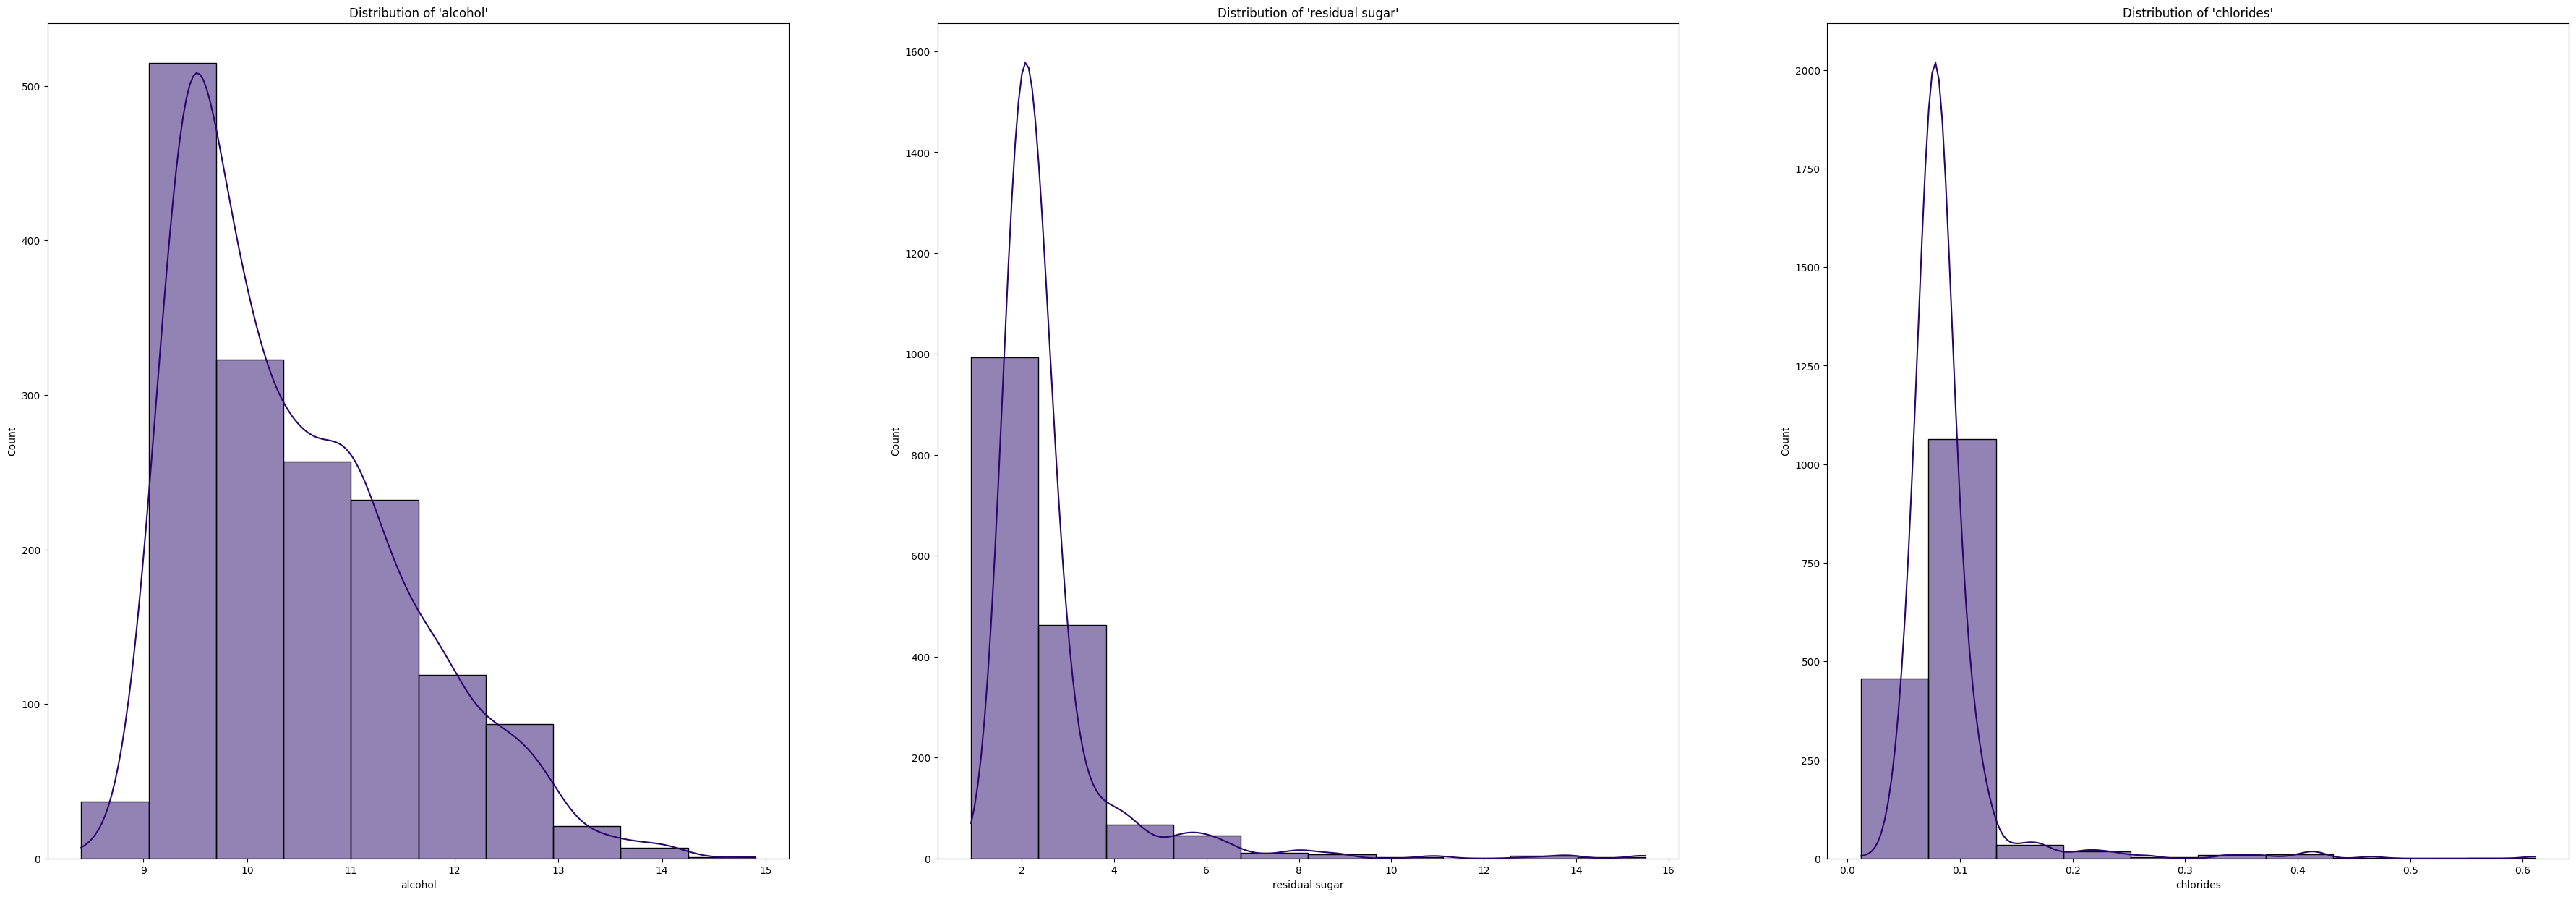

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(45, 15))

sns.histplot(ax = axes[0], x = df["alcohol"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'alcohol'");

sns.histplot(ax = axes[1], x = df["residual sugar"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'residual sugar'");

sns.histplot(ax = axes[2], x = df["chlorides"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'chlorides'");

Berdasarkan grafik di atas didapatkan bahwa distribusi variabelnya tidak normal

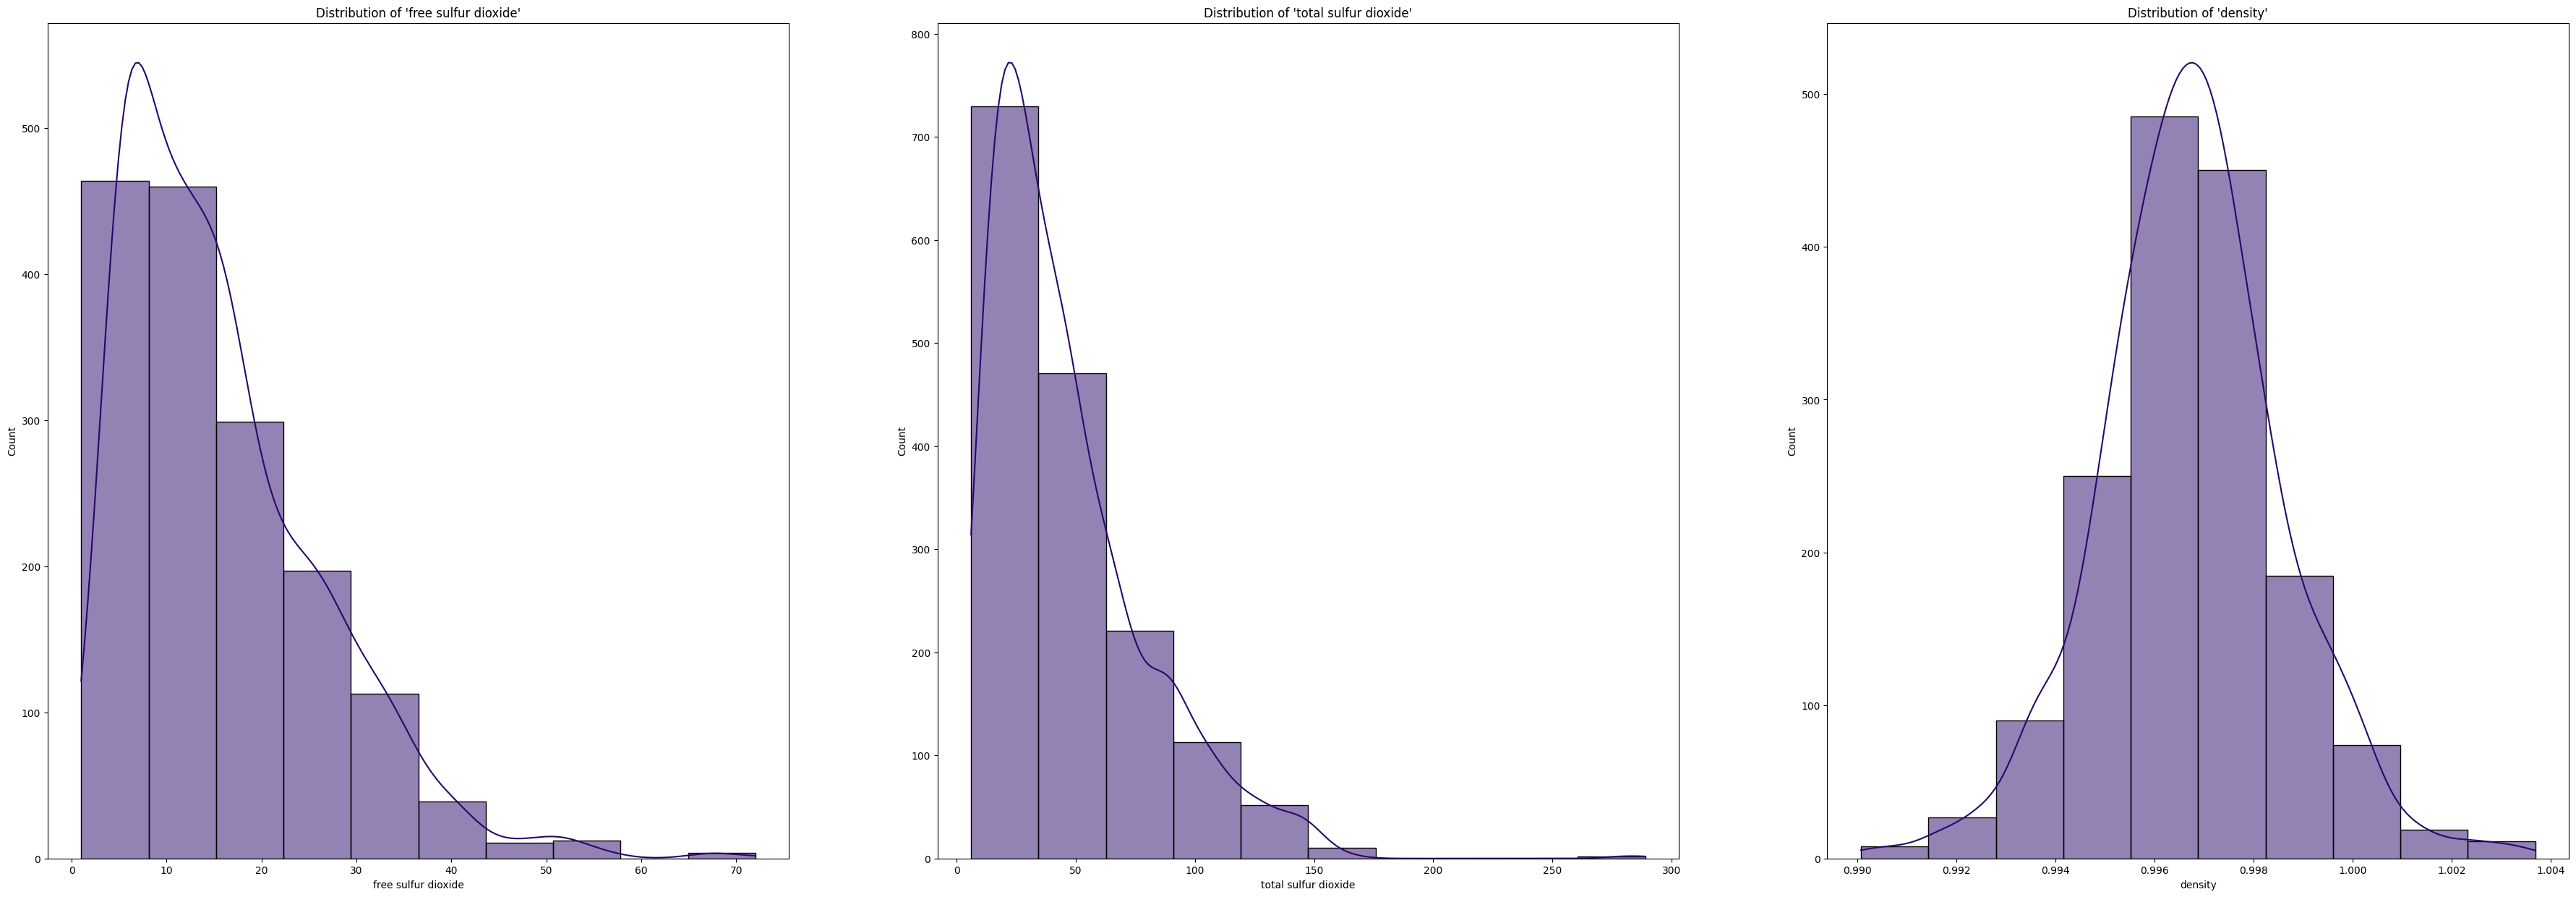

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(45, 15))

sns.histplot(ax = axes[0], x = df["free sulfur dioxide"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'free sulfur dioxide'");

sns.histplot(ax = axes[1], x = df["total sulfur dioxide"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'total sulfur dioxide'");

sns.histplot(ax = axes[2], x = df["density"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'density'");

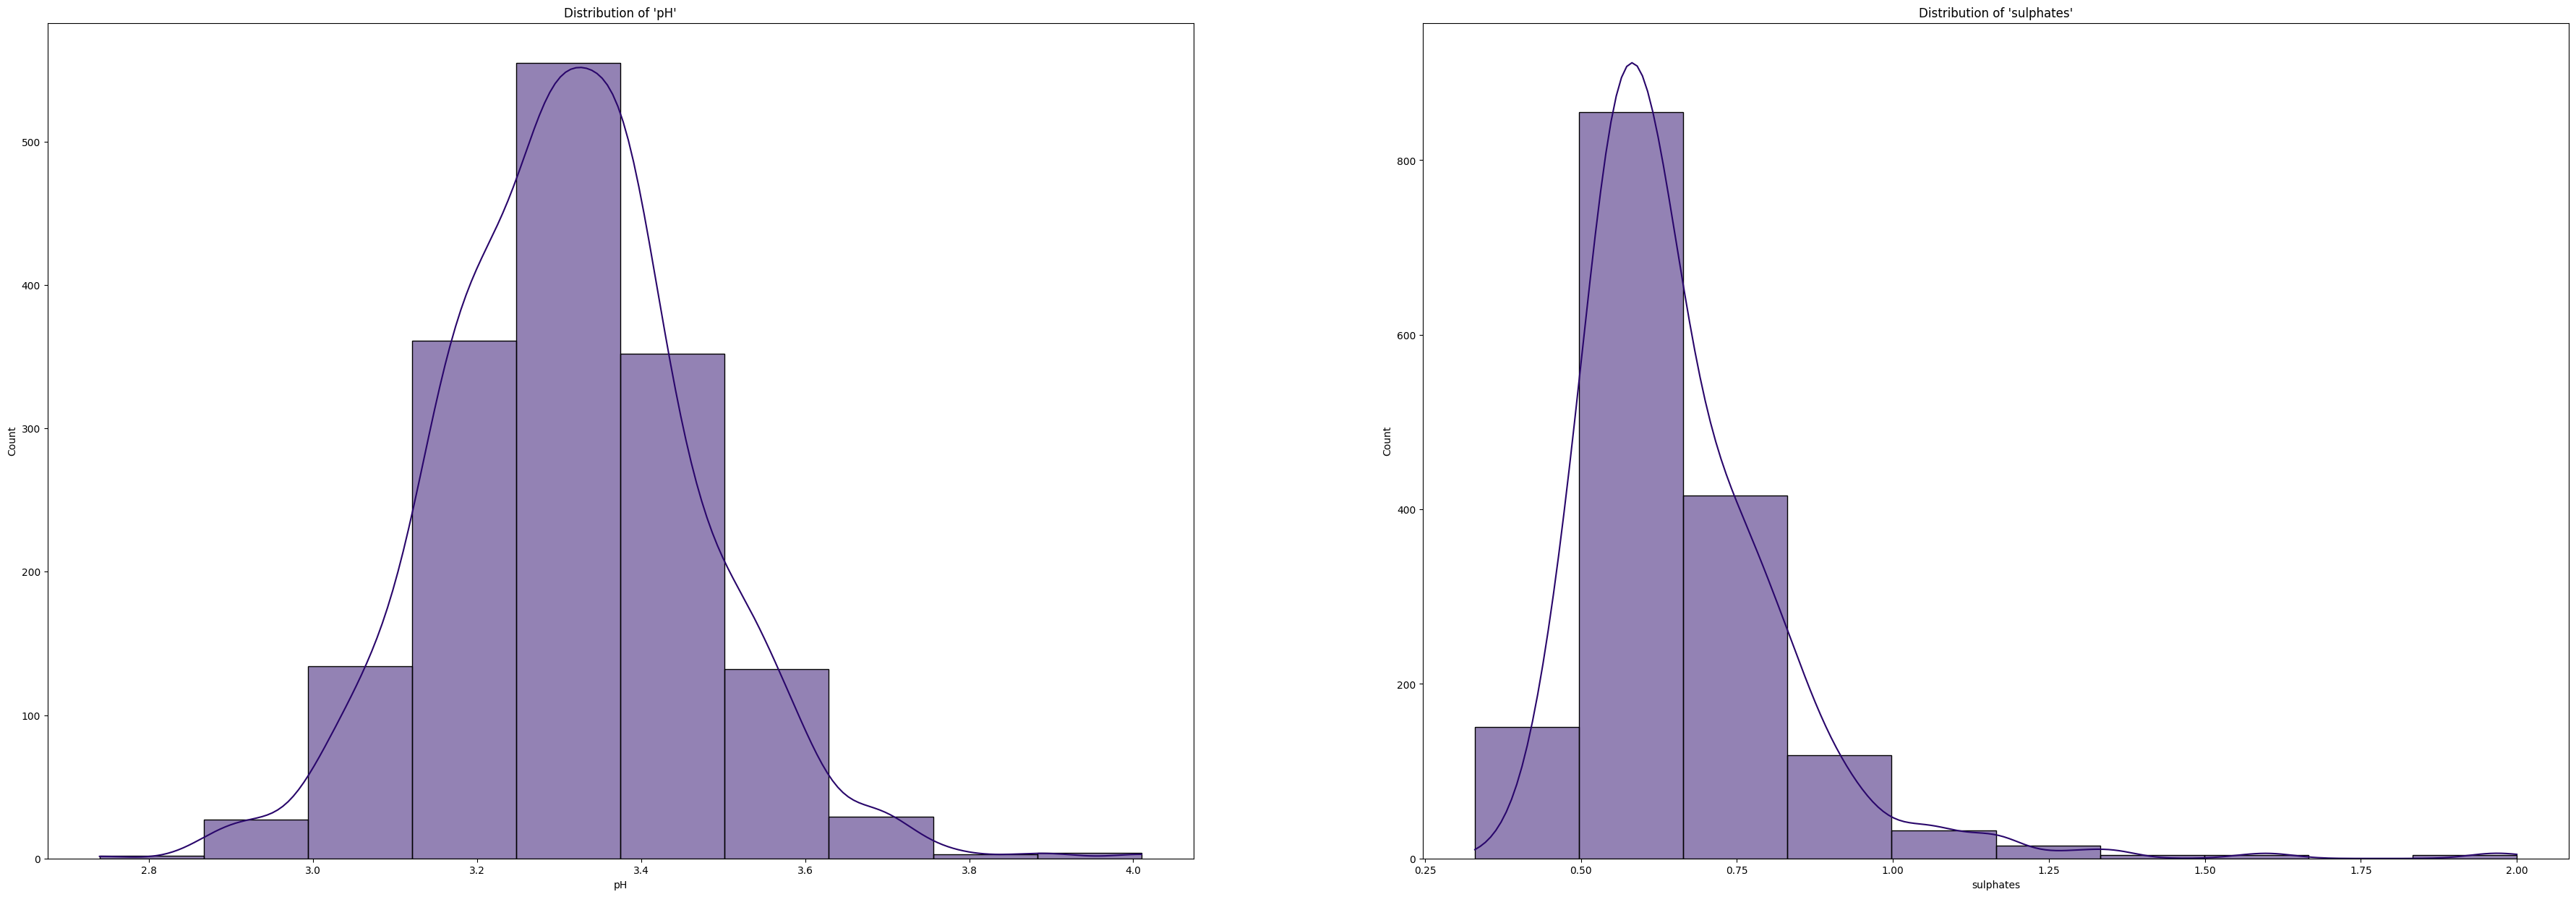

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(45, 15))

sns.histplot(ax = axes[0], x = df["pH"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'pH'");

sns.histplot(ax = axes[1], x = df["sulphates"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'sulphates'");

<ipython-input-16-91959c85e441>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");


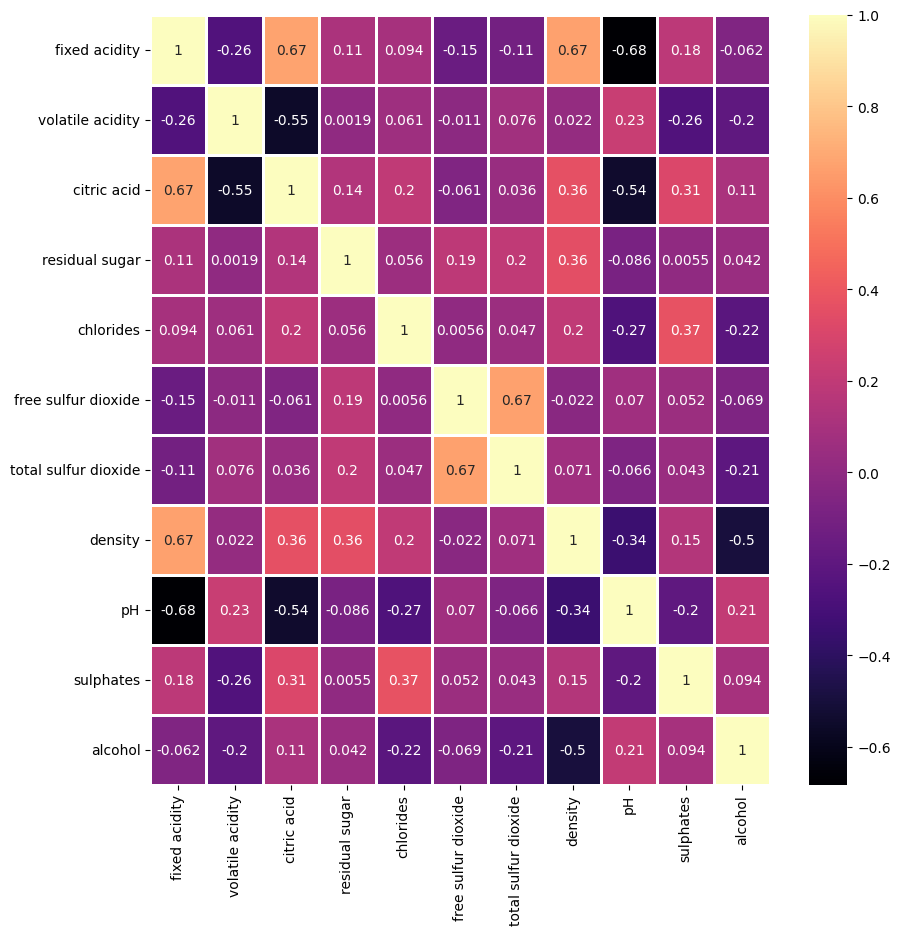

In [16]:
# Matrix Korelasi
plt.figure(figsize = [10, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

Di sini kita melihat bahwa ada korelasi yang relatif tinggi (0,67, korelasi positif) antara variabel 'free sulfur dioxide' dan 'total sulfur dioxide'. Terdapat korelasi yang relatif tinggi (-0,68, korelasi negatif) antara variabel "pH" dan "fixed acidity". Selain itu, terdapat korelasi sekitar 0,5 antara beberapa variabel lainnya. Itulah mengapa kita harus mempertimbangkannya ketika membangun model Machine Learningnya. Karena variabel/atribut "residual sugar" memiliki korelasi dibawah 0,05 terhadap "quality", maka kita akan buang/drop.

In [17]:
# Buang variabel residual sugar
df.drop('residual sugar', axis =1)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


<Axes: xlabel='quality', ylabel='count'>

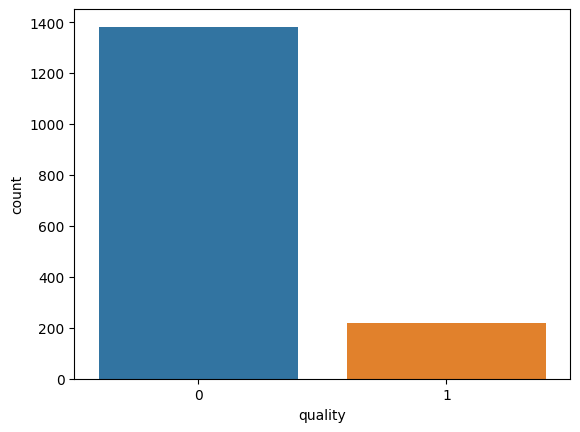

In [18]:
# Visualisasi Data y (variabel dependen)
sns.countplot(x ='quality', data = df)

## **4. Metode Klasifikasi**

### **4.1. K-NN (K-Nearest Neighbor)**




In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train_sm, y_train_sm)
y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_pred_knn, y_test)

print('Akurasi metode KNN: ', round(accuracy,8),' atau ', round(accuracy*100,2),'%', sep='')

Akurasi metode KNN: 0.80625 atau 80.62%


In [20]:
## Evaluasi model 

k = 10
mean_acc = []
std_acc = []

for i in range(1,k):
    knn_method = KNeighborsClassifier(n_neighbors = i)
    knn_method.fit(X_train_sm, y_train_sm)
    y_pred_knn = knn_method.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_pred_knn, y_test))
    std_acc.append(np.std(y_pred_knn==y_test)/np.sqrt(y_pred_knn.shape[0]))
    
mean_acc

[0.88125,
 0.890625,
 0.834375,
 0.85625,
 0.80625,
 0.81875,
 0.78125,
 0.803125,
 0.775]

Dari sini sebenarnya dapat terlihat jika k =2 merupakan hasil terbaik

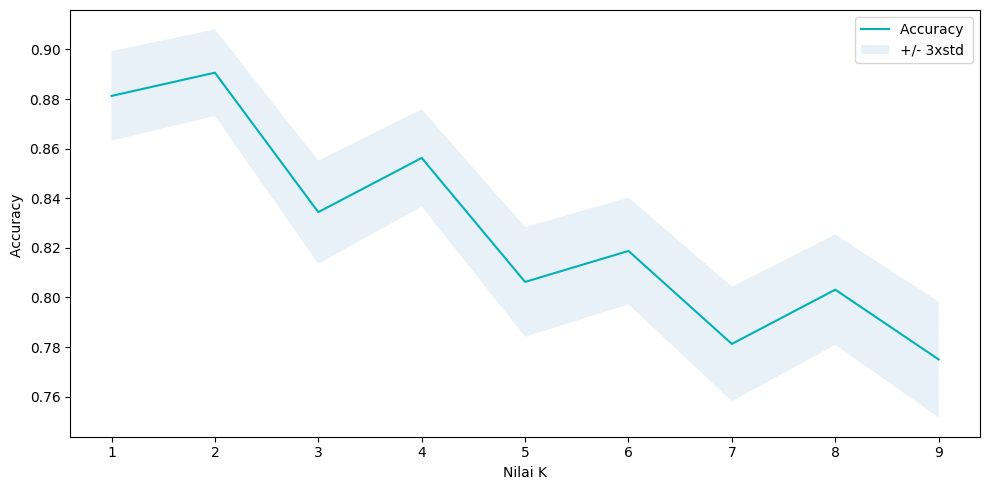

In [21]:
## K-NN 

plt.figure(figsize = (10,5))
plt.plot(range(1,k),mean_acc, color='#01b1b5')
plt.fill_between(range(1,k),
                np.array(mean_acc) - 1 * np.array(std_acc),
                mean_acc + 1 * np.array(std_acc), 
                alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Nilai K')
plt.tight_layout()
plt.show()

In [22]:
# Menampilkan Akurasi Terbaik

print("Nilai Akurasi terbaik ada pada ", 
      round(np.array(mean_acc).max()*100,2), 
      "% dengan k = ", np.array(mean_acc).argmax()+1, sep='') 

Nilai Akurasi terbaik ada pada 89.06% dengan k = 2


### **4.2. Decision Tree**

In [23]:
tree_method = DecisionTreeClassifier()
tree_method.fit(X_train_sm, y_train_sm)
y_pred_tree = tree_method.predict(X_test)
accuracy_tree = metrics.accuracy_score(y_pred_tree, y_test)
print('Akurasi Prediksi method Tree : ',round(accuracy_tree,8), ' atau ',round(accuracy_tree*100,2),'%', sep='')


Akurasi Prediksi method Tree : 0.859375 atau 85.94%


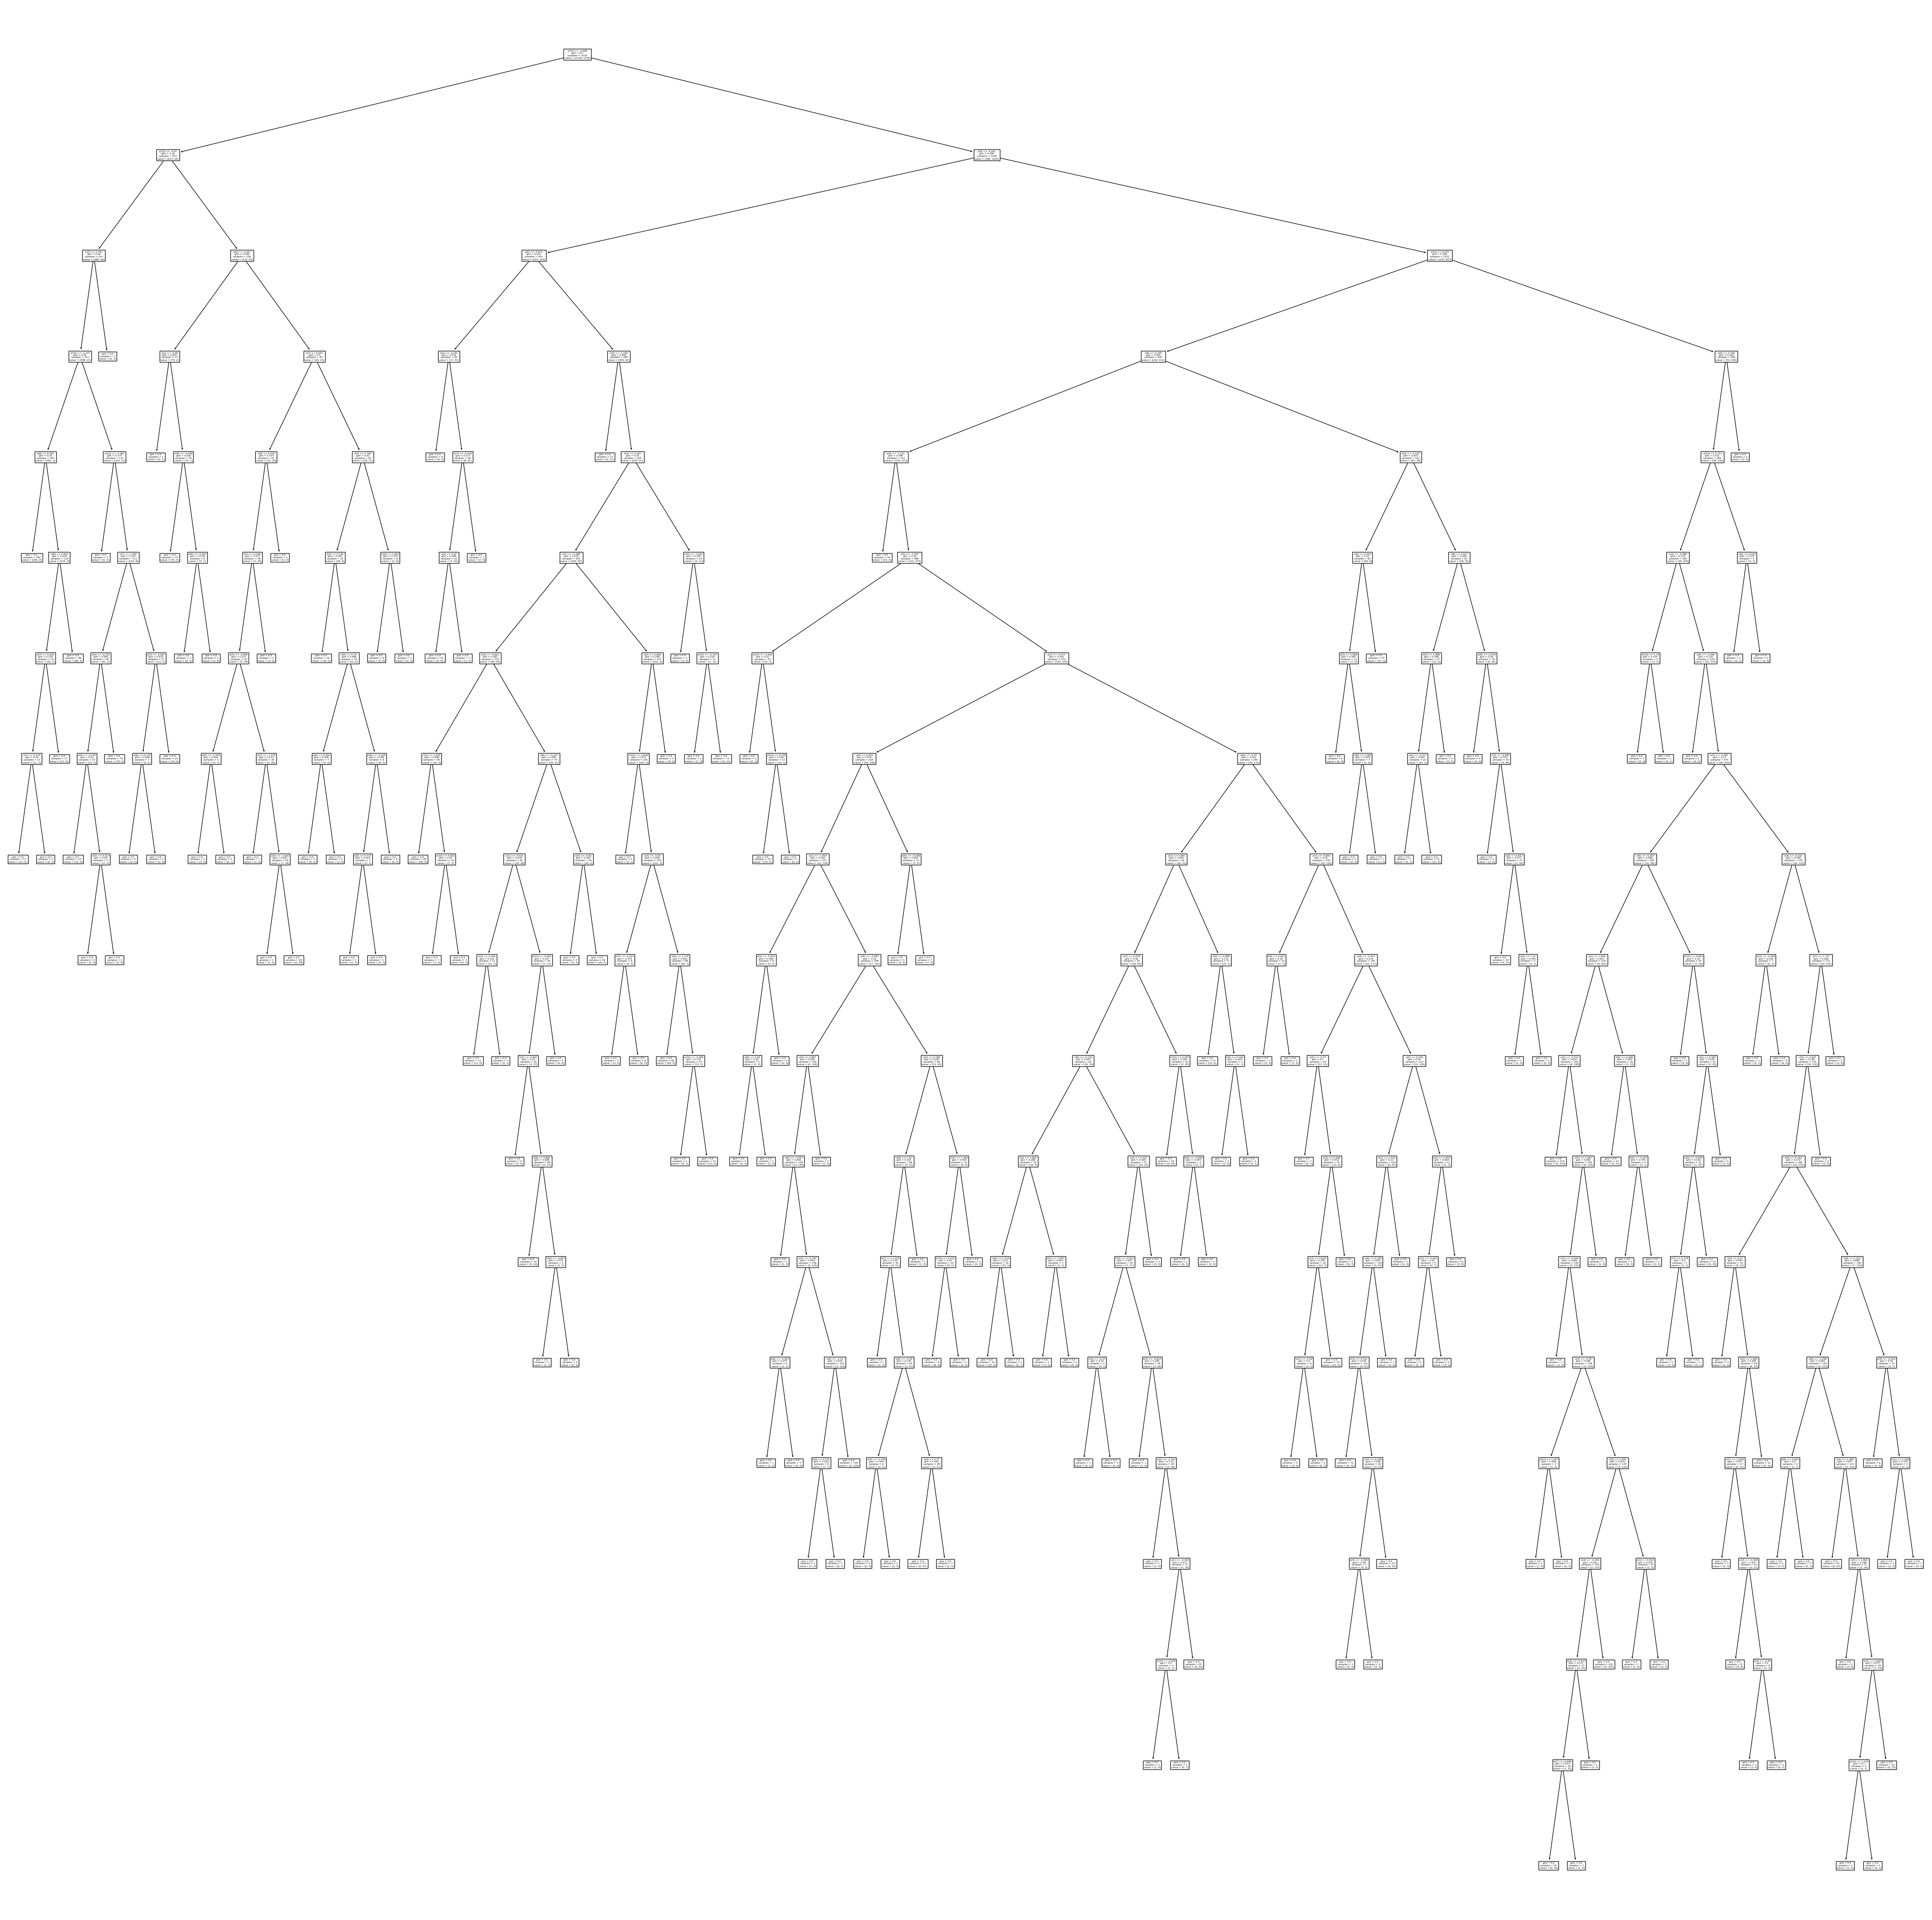

In [24]:
## Evaluasi Model 
plt.figure(figsize=(60,60))
tree.plot_tree(tree_method)
plt.show()

### **4.3. Naive Bayes**

In [25]:
bayes_method = naive_bayes.BernoulliNB()
bayes_method.fit(X_train_sm, y_train_sm)
y_pred_bayes = bayes_method.predict(X_test)
accuracy_bayes = metrics.accuracy_score(y_pred_bayes, y_test)
print('Akurasi Prediksi Bayes : ',round(accuracy_bayes,8), ' atau ',round(accuracy_bayes*100,2),'%', sep='')

Akurasi Prediksi Bayes : 0.771875 atau 77.19%


## **5. Akusisi Data**

###**5.1. Membuat Fungsi Confution Matriks**

In [26]:
def get_conf_matriks(y_actual, y_predic, cmap = None, title='Tidak ada', ):
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predic)
    ax = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap = cmap)
    ax.set_xlabel("Prediksi", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['Bad', 'Good'])
    ax.set_ylabel("Actual", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['Bad', 'Good'])
    ax.set_title(title, fontsize=14, pad=20)
    plt.show()
    
    conf_matrix_value = (confusion_matrix[0,0] + confusion_matrix[1,1]) / sum(sum(confusion_matrix))
    print("Hasil Confution Matriks :" , round(conf_matrix_value*100,2), "%", sep='')

###**5.2. Matriks Confution K-NN**




Karena dari hasil sebelumnya kita mengetahui bahwa nilai k terbaik adalah 2 maka kita akan inisialisasi ulang model K-NN dengan nilai k=2, karena jika tidak, maka nilai k yang akan terpakai pada y_pred_knn di matriks confutionnya akan mengambil nilai k terakhir dari pemodelan K-NN yang telah dilakukan diatas (nilai k=10) dan ini tidak akan memberikan hasil maksimal pada matriks confution K-NN nantinya

In [27]:
# K-NN dengan k=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_sm, y_train_sm)
y_pred_knn = knn.predict(X_test)

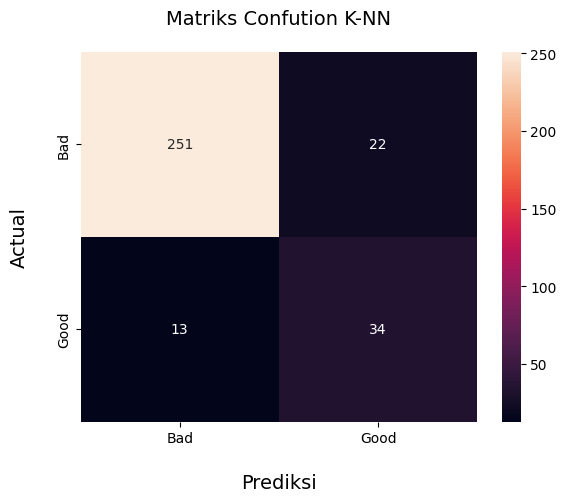

Hasil Confution Matriks :89.06%


In [28]:
# Matriks Confution K-NN
get_conf_matriks(y_test, y_pred_knn, title='Matriks Confution K-NN')

dari matriks confution diatas didapatkan bahwa:
*   terdapat 34 data wine yang diprediksi Good quality yang ternyata Good quality pada data aktual nya
*   terdapat 251 data wine yang diprediksi Bad quality yang ternyata Bad quality pada data aktual nya
*    terdapat 22 data wine yang diprediksi Good quality yang ternyata Bad quality pada data aktual nya
*    terdapat 13 data wine yang diprediksi Bad quality yang ternyata Good quality pada data aktual nya



###**5.3. Matriks Confution Decision Tree**

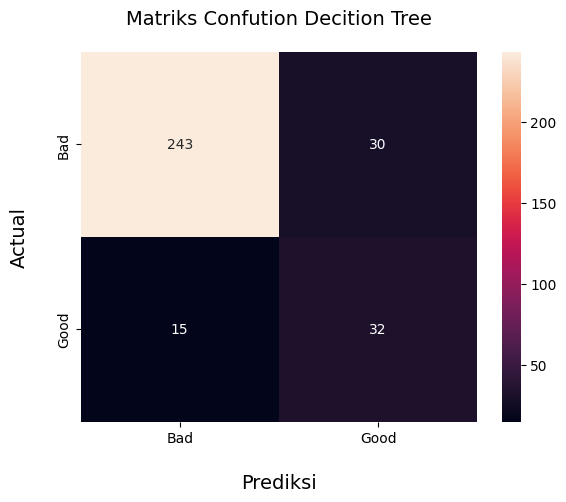

Hasil Confution Matriks :85.94%


In [29]:
get_conf_matriks(y_test, y_pred_tree, title='Matriks Confution Decition Tree')

dari matriks confution diatas didapatkan bahwa:
*   terdapat 32 data wine yang diprediksi Good quality yang ternyata Good quality pada data aktual nya
*   terdapat 250 data wine yang diprediksi Bad quality yang ternyata Bad quality pada data aktual nya
*    terdapat 23 data wine yang diprediksi Good quality yang ternyata Bad quality pada data aktual nya
*    terdapat 15 data wine yang diprediksi Bad quality yang ternyata Good quality pada data aktual nya


###**5.4. Matriks Confution Naive Bayes**

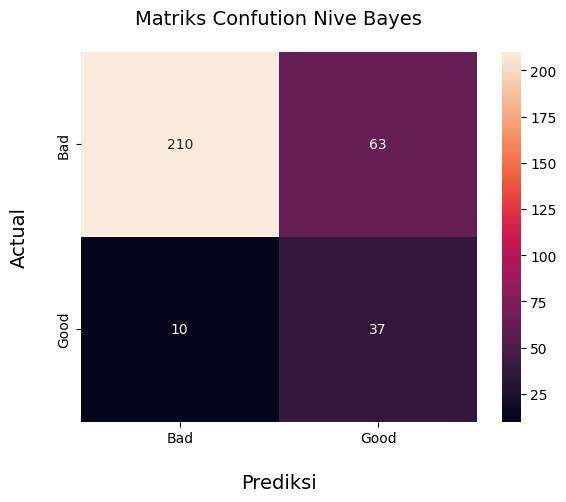

Hasil Confution Matriks :77.19%


In [30]:
get_conf_matriks(y_test, y_pred_bayes, title='Matriks Confution Nive Bayes')

dari matriks confution diatas didapatkan bahwa:
*   terdapat 37 data wine yang diprediksi Good quality yang ternyata Good quality pada data aktual nya
*   terdapat 210 data wine yang diprediksi Bad quality yang ternyata Bad quality pada data aktual nya
*    terdapat 63 data wine yang diprediksi Good quality yang ternyata Bad quality pada data aktual nya
*    terdapat 10 data wine yang diprediksi Bad quality yang ternyata Good quality pada data aktual nya


## **6. Kesimpulan**

Dari ketiga metode yang digunakan yaitu K-NN, Decitioin Tree, dan Naive Bayes untuk melakukan klasifiakasi pada data set "red wine quality" ini dengan harapan dapat ditemukan wine yang beresiko memiliki kualitas baik(good quality) atau tidak (bad quality). Berdasarkan dari melihat akurasi dan hasil dari Confution Matriks dari ketiga metode yang telah dilakukan, maka dapat disimpulkan bahwa metode terbaik untuk melakukan klasisfikasi pada data set ini, yaitu menggunakan metode K-NN dengan nilai akurasi 89.06%. atau dapat di lihat matriks confution dari Devition Tree berikut:

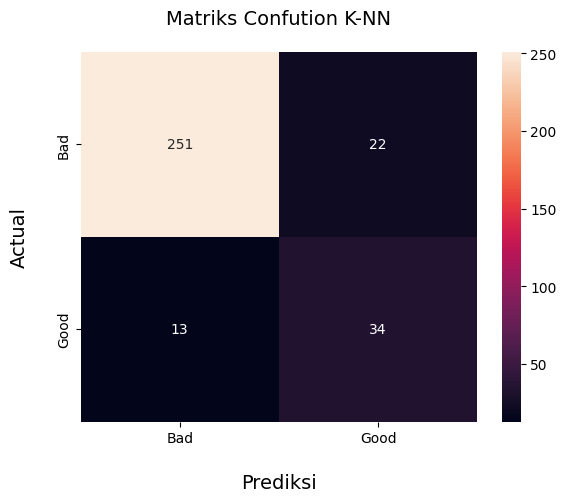

Hasil Confution Matriks :89.06%


In [31]:
get_conf_matriks(y_test, y_pred_knn, title='Matriks Confution K-NN')